In [32]:
import numpy as np
import pandas as pd

In [33]:
path = './data4.xlsx'
df = pd.read_excel(path, skiprows=[1])

In [35]:
keywords = list(df['검색어'].unique())
keywords

['online+copyright+infringement', 'metaverse+violence', 'metaverse+defamation']

In [42]:
def changeMonth(s):
  ret = s
  if s.endswith(' (edited)'):
    ret = ret[:-9]
  num = ret.split()[0]
  ret = ret.split()[1]
  if ret[:4] == 'year': # years ago
    ret = (ord(num[0]) - ord('0')) * 12
  elif ret[:5] == 'month': # months ago
    ret = ord(num[0]) - ord('0')
  elif ret[:4] == 'week' or ret[:3] == 'day' or ret[:4] == 'hour' or ret[:6] == 'minute' or ret[:6] == 'second':
    return 0
  else:
    print(s)
    return None
  return ret

def changeYear(s):
  ret = s
  if s.endswith(' (edited)'):
    ret = ret[:-9]
  num = ret.split()[0]
  ret = ret.split()[1]
  if ret[:4] == 'year': # years ago
    ret = (ord(num[0]) - ord('0'))
  elif ret[:5] == 'month' or ret[:4] == 'week' or ret[:3] == 'day' or ret[:4] == 'hour' or ret[:6] == 'minute' or ret[:6] == 'second':
    return 0
  else:
    print(s)
    return None
  return ret

In [70]:
def changeViews(s):
  ret = s.split()[0]
  multiplier = 1
  if ret[-1] == 'M':
    multiplier = 1000000
    ret = ret[:-1]
  elif ret[-1] == 'K':
    multiplier = 1000
    ret = ret[:-1]
  ret = int(float(ret) * multiplier)
  return ret

In [71]:
convertedMonth = df['시각'].map(changeMonth).astype(int)
convertedYear = df['시각'].map(changeYear).astype(int)
convertedViews = df['조회수'].map(changeViews).astype(int)
convertedViews.head(10)

0    23000
1    23000
2    23000
3    23000
4    23000
5    23000
6    23000
7    23000
8    23000
9    23000
Name: 조회수, dtype: int64

In [72]:
df['commentMonth'] = convertedMonth
df['commentYear'] = convertedYear
df['views'] = convertedViews

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


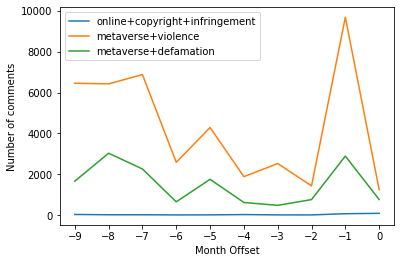

In [53]:
for keyword in keywords:
  df_keyword = df[df['검색어'] == keyword]
  df_recent = df_keyword[df_keyword['commentMonth'] < 12] * (-1)
  df_vc = df_recent['commentMonth'].value_counts().sort_index()
  df_vc.name = keyword
  print(df_vc.plot.line(legend=True, xlabel='Month Offset', ylabel='Number of comments', xticks=range(-9, 1, 1)))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


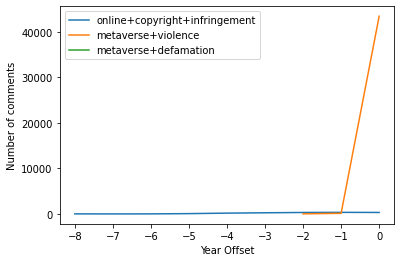

In [52]:
oldest_year = df['commentYear'].max()

for keyword in keywords:
  df_keyword = df[df['검색어'] == keyword] * (-1)
  df_vc = df_keyword['commentYear'].value_counts().sort_index()
  df_vc.name = keyword
  print(df_vc.plot.line(legend=True, xlabel='Year Offset', ylabel='Number of comments', xticks=range(-oldest_year, 1, 1)))

                online+copyright+infringement  metaverse+violence  \
Uploader count                             23                  43   

                metaverse+defamation  
Uploader count                    28  


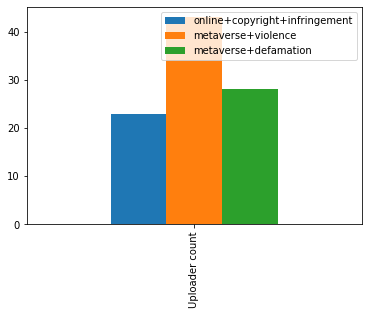

In [69]:
uploader_df = pd.DataFrame(index=['Uploader count'])

for keyword in keywords:
  uploader_cnt = df[df['검색어'] == keyword]['업로더'].unique().size
  uploader_df = pd.concat([uploader_df, pd.DataFrame({keyword: uploader_cnt},
                                                      index=['Uploader count'])], axis=1)

print(uploader_df)

uploader_df.plot.bar(legend=True, figsize=)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


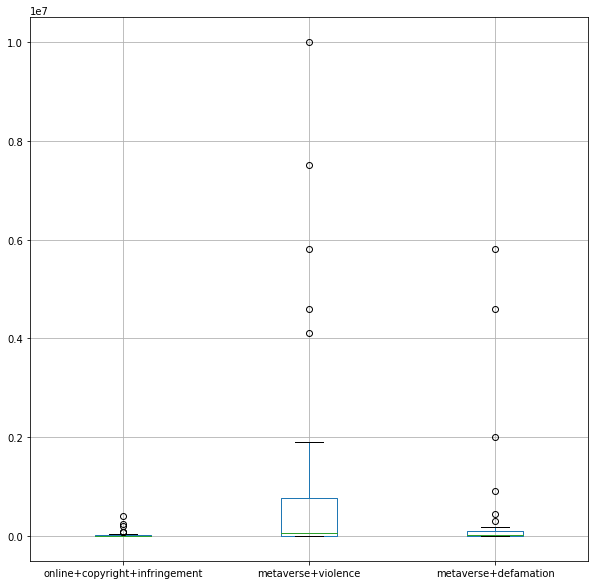

In [98]:
unique_views_dataframe = pd.DataFrame()

for keyword in keywords:
  unique_views = pd.DataFrame(df[df['검색어'] == keyword]['views'].unique(), columns=[keyword])
  unique_views_dataframe = pd.concat([unique_views_dataframe, unique_views], axis=1)

#print(unique_views_dataframe)
graph = unique_views_dataframe.boxplot(figsize=(10, 10), showfliers=True)